<h1><center><span style="color:blue">Particles and decays<br>in the Scikit-HEP project</span></center></h1>

<h2><center>Eduardo Rodrigues<br>University of Cincinnati </center></h2>

<h3><center><span style="color:gray">PyHEP 2019 Workshop, Abingdon, 16-18 October 2019</span></center></h3>

Notebook: https://github.com/eduardo-rodrigues/2019-10-16_PyHEP2019Workshop

<center><img src="images/Particle_logo.png" alt="Particle package logo" style="width: 200px;"/></center>

<h2><center><span style="color:green">PDG particle data and MC identification codes<br>with the <i>Particle</i> package</span></center></h2>

### **Pythonic interface to**
- Particle Data Group (PDG) particle data table.
- Particle MC identification codes, with inter-MC converters.
- With various extra goodies.

### Package motivation - particle data

- The [PDG](http://pdg.lbl.gov/) provides a <span style="color:green">downloadable table of particle masses, widths, charges and Monte Carlo particle ID numbers</span> (PDG IDs).
  - Most recent file [here](http://pdg.lbl.gov/2019/html/computer_read.html).
- It <span style="color:green">also provided an experimental file with extended information</span>
(spin, quark content, P and C parities, etc.) until 2008 only, see [here](http://pdg.lbl.gov/2008/html/computer_read.html) (not widely known!).

- But <span style="color:green">*anyone* wanting to use these data</span>, the only readily available,
<span style="color:green">has to parse the file programmatically</span>.
- Why not make a Python package to deal with all these data, for everyone?

### Package motivation - MC identification codes

- The <span style="color:green">C++ HepPID and HepPDT libraries provide functions for processing particle ID codes</apan>
in the standard particle (aka PDG) numbering scheme.
- Different event generators have their separate set of particle IDs: Pythia, EvtGen, etc.
- Again, why not make a package providing all functionality/conversions, Python-ically, for everyone?

### Package, in short

- <span style="color:green">Particle</span> - loads extended **PDG data tables** and implements search and manipulations / display.
- <span style="color:green">PDGID</span> - find out as much as possible from the PDG ID number. **No table lookup**.
- <span style="color:green">Converters for MC IDs</span> used in Pythia and Geant.


- Basic usage via the command line.
- Fexible / advanced usage programmatically.

### 1. Command line usage

Search and query ...

In [1]:
!python -m particle --version

particle 0.6.2


In [3]:
!python -m particle -h

usage: particle [-h] [--version] {search,pdgid} ...

Particle command line display utility. Has two modes.

positional arguments:
  {search,pdgid}  Subcommands
    search        Look up particles by PID or name (Ex.: python -m particle
                  search D+ D-)
    pdgid         Print info from PID (Ex.: python -m particle pdgid 11 13)

optional arguments:
  -h, --help      show this help message and exit
  --version       show program's version number and exit


#### PDGID

Print all information from a PDG ID:

In [4]:
!python -m particle pdgid 211

<PDGID: 211>
A              None
C              None
J              0.0
L              0
P              -1
S              0
Z              None
abspid         211
charge         1.0
has_bottom     False
has_charm      False
has_down       True
has_fundamental_anti False
has_strange    False
has_top        False
has_up         True
is_Qball       False
is_Rhadron     False
is_SUSY        False
is_baryon      False
is_diquark     False
is_dyon        False
is_hadron      True
is_lepton      False
is_meson       True
is_nucleus     False
is_pentaquark  False
is_valid       True
j_spin         1
l_spin         1
s_spin         1
three_charge   3



#### Particle

Search a particle by its PDG ID - return description summary of particle:

In [5]:
!python -m particle search 211

Name: pi+            ID: 211          Latex: $\pi^{+}$
Mass  = 139.57061 ± 0.00024 MeV
Lifetime = 26.033 ± 0.005 ns
Q (charge)        = +       J (total angular) = 0.0      P (space parity) = -
C (charge parity) = ?       I (isospin)       = 1        G (G-parity)     = -
    SpinType: SpinType.PseudoScalar
    Quarks: uD
    Antiparticle name: pi- (antiparticle status: ChargeInv)



Search a particle by its name - either return the description summary of matching particle ...

In [6]:
!python -m particle search "pi(1400)+"

Name: pi(1)(1400)+   ID: 9000213      Latex: $\pi_{1}(1400)^{+}$
Mass  = 1354 ± 25 MeV
Width = 330 ± 35 MeV
Q (charge)        = +       J (total angular) = 1.0      P (space parity) = -
C (charge parity) = ?       I (isospin)       = 1        G (G-parity)     = -
    SpinType: SpinType.Vector
    Quarks: Maybe non-qQ
    Antiparticle name: pi(1)(1400)- (antiparticle status: ChargeInv)



... or a list of particles matching the keyword in their names:

In [7]:
!python -m particle search "pi+"

<Particle: name="pi+", pdgid=211, mass=139.57061 ± 0.00024 MeV>
<Particle: name="pi(2)(1670)+", pdgid=10215, mass=1670.6 + 2.9 - 1.2 MeV>
<Particle: name="pi(1300)+", pdgid=100211, mass=1300 ± 100 MeV>
<Particle: name="pi(1)(1400)+", pdgid=9000213, mass=1354 ± 25 MeV>
<Particle: name="pi(1800)+", pdgid=9010211, mass=1810 + 9 - 11 MeV>
<Particle: name="pi(1)(1600)+", pdgid=9010213, mass=1660 + 15 - 11 MeV>



#### Bonus feature: zipapp

Package provides a [zipapp](https://docs.python.org/3/library/zipapp.html) version - **one file** that runs on **any computer with Python**, no other dependencies! Find it [attached to releases](https://github.com/scikit-hep/particle/releases).

Example:

```bash
./particle.pyz search gamma
```

All dependencies are installed inside the zipapp, and the data lookup is handled in a zip-safe way inside particle. Python 3 is used to make the zipapp, but including the backports makes it work on Python 2 as well.

### 2. `PDGID` class and MC ID classes


- Classes `PDGID`, `PythiaID`, `GeantID`.
- Converters in module `particle.converters`: `Geant2PDGIDBiMap`, etc.

#### PDG IDs module overview

- <span style="color:green">Process and query PDG IDs</span>, and more – no look-up table needed.
  - Current version of package reflects the latest version of the
    <span style="color:green">HepPID & HepPDT utility functions</span> defined in the C++ HepPID and HepPDT versions 3.04.01
  - It contains more functionality than that available in the C++ code … and minor fixes too.
- Definition of a <span style="color:green">PDGID class, PDG ID literals</span>,
and set of standalone HepPID <span style="color:green">functions to query PDG IDs</span>
(is_meson, has_bottom, j_spin, charge, etc.).
   - All PDGID class functions are available standalone.

#### PDGID class
- Wrapper class `PDGID` for PDG IDs.
- Behaves like an int, with extra goodies.
- Large spectrum of properties and methods, with a Pythonic interface, and yet more!

In [8]:
from particle import PDGID

In [9]:
pid = PDGID(211)
pid

<PDGID: 211>

In [10]:
PDGID(99999999)

<PDGID: 99999999 (is_valid==False)>

In [11]:
from particle.pdgid import is_meson

pid.is_meson, is_meson(pid)

(True, True)

To print all `PDGID` properties:

In [12]:
print(pid.info())

A              None
C              None
J              0.0
L              0
P              -1
S              0
Z              None
abspid         211
charge         1.0
has_bottom     False
has_charm      False
has_down       True
has_fundamental_anti False
has_strange    False
has_top        False
has_up         True
is_Qball       False
is_Rhadron     False
is_SUSY        False
is_baryon      False
is_diquark     False
is_dyon        False
is_hadron      True
is_lepton      False
is_meson       True
is_nucleus     False
is_pentaquark  False
is_valid       True
j_spin         1
l_spin         1
s_spin         1
three_charge   3



#### MC ID classes and converters

- <span style="color:green">Classes for MC IDs</span> used in Pythia and Geant: `PythiaID` and `GeantID`.
- <span style="color:green">ID converters</span> in module `particle.converters`: `Geant2PDGIDBiMap`, etc.

In [14]:
from particle import PythiaID, GeantID

pyid = PythiaID(10221)

pyid.to_pdgid()

<PDGID: 9010221>

Conversions are directly available via mapping classes.

E.g., bi-directional map Pythia ID - PDG ID:

In [15]:
from particle.converters import Pythia2PDGIDBiMap

Pythia2PDGIDBiMap[PDGID(9010221)]

<PythiaID: 10221>

In [16]:
Pythia2PDGIDBiMap[PythiaID(10221)]

<PDGID: 9010221>

### 3. `Particle` class

There are lots of ways to create a particle.

In [20]:
from particle import Particle

#### From a PDG ID

In [18]:
Particle.from_pdgid(211)

<Particle: name="pi+", pdgid=211, mass=139.57061 ± 0.00024 MeV>

#### From a name

In [21]:
Particle.from_string('pi+')

<Particle: name="pi+", pdgid=211, mass=139.57061 ± 0.00024 MeV>

#### Searching

<span style="color:green">Simple and natural API</span> to deal with the PDG particle data table,<br>with <span style="color:green">powerful 1-line search and look-up utilities!</span>

- `Particle.find(…)` – search a single match (exception raised if multiple particles match the search specifications).
- `Particle.findall(…)` – search a list of candidates.

- Search methods that can query any particle property!

In [22]:
Particle.find('J/psi')

<Particle: name="J/psi(1S)", pdgid=443, mass=3096.900 ± 0.006 MeV>

You can specify search terms as keywords - _any particle property_:

In [23]:
Particle.find(latex_name=r'\phi(1020)')

<Particle: name="phi(1020)", pdgid=333, mass=1019.461 ± 0.016 MeV>

Some properties have enums available. For example, you can directly check the numeric charge:

In [24]:
Particle.findall('pi', charge=-1)

[<Particle: name="pi-", pdgid=-211, mass=139.57061 ± 0.00024 MeV>,
 <Particle: name="pi(2)(1670)-", pdgid=-10215, mass=1670.6 + 2.9 - 1.2 MeV>,
 <Particle: name="pi(1300)-", pdgid=-100211, mass=1300 ± 100 MeV>,
 <Particle: name="pi(1)(1400)-", pdgid=-9000213, mass=1354 ± 25 MeV>,
 <Particle: name="pi(1800)-", pdgid=-9010211, mass=1810 + 9 - 11 MeV>,
 <Particle: name="pi(1)(1600)-", pdgid=-9010213, mass=1660 + 15 - 11 MeV>]

Or you can use the enum (for charge, this is 3 times the charge, hence the name `three_charge`)

In [25]:
from particle import Charge

Particle.findall('pi', three_charge=Charge.p)

[<Particle: name="pi+", pdgid=211, mass=139.57061 ± 0.00024 MeV>,
 <Particle: name="pi(2)(1670)+", pdgid=10215, mass=1670.6 + 2.9 - 1.2 MeV>,
 <Particle: name="pi(1300)+", pdgid=100211, mass=1300 ± 100 MeV>,
 <Particle: name="pi(1)(1400)+", pdgid=9000213, mass=1354 ± 25 MeV>,
 <Particle: name="pi(1800)+", pdgid=9010211, mass=1810 + 9 - 11 MeV>,
 <Particle: name="pi(1)(1600)+", pdgid=9010213, mass=1660 + 15 - 11 MeV>]

Or use a **lambda function** for the ultimate in generality! For example, to find all the neutral particles with a bottom quark between 5.2 and 5.3 GeV:

In [26]:
from hepunits import GeV, s  # Units are good. Use them.

In [27]:
Particle.findall(lambda p:
                     p.pdgid.has_bottom
                     and p.charge==0
                     and 5.2*GeV < p.mass < 5.3*GeV
                )

[<Particle: name="B0", pdgid=511, mass=5279.64 ± 0.13 MeV>,
 <Particle: name="B~0", pdgid=-511, mass=5279.64 ± 0.13 MeV>]

Another lambda function example: You can use the width or the lifetime:

In [28]:
Particle.findall(lambda p: p.lifetime > 1000*s)

[<Particle: name="e-", pdgid=11, mass=0.510998946 ± 0.000000003 MeV>,
 <Particle: name="e+", pdgid=-11, mass=0.510998946 ± 0.000000003 MeV>,
 <Particle: name="nu(e)", pdgid=12, mass=0.0 MeV>,
 <Particle: name="nu(e)~", pdgid=-12, mass=0.0 MeV>,
 <Particle: name="nu(mu)", pdgid=14, mass=0.0 MeV>,
 <Particle: name="nu(mu)~", pdgid=-14, mass=0.0 MeV>,
 <Particle: name="nu(tau)", pdgid=16, mass=0.0 MeV>,
 <Particle: name="nu(tau)~", pdgid=-16, mass=0.0 MeV>,
 <Particle: name="g", pdgid=21, mass=0.0 MeV>,
 <Particle: name="gamma", pdgid=22, mass=0.0 MeV>,
 <Particle: name="H0", pdgid=25, mass=125100 ± 140 MeV>,
 <Particle: name="B*+", pdgid=523, mass=5324.70 ± 0.22 MeV>,
 <Particle: name="B*-", pdgid=-523, mass=5324.70 ± 0.22 MeV>,
 <Particle: name="p", pdgid=2212, mass=938.272081 ± 0.000006 MeV>,
 <Particle: name="p~", pdgid=-2212, mass=938.272081 ± 0.000006 MeV>,
 <Particle: name="h(b)(1P)", pdgid=10553, mass=9899.3 ± 0.8 MeV>,
 <Particle: name="Upsilon(2)(1D)", pdgid=20555, mass=10163.7 

If you want infinite lifetime, you could just use the keyword search instead:

In [29]:
Particle.findall(lifetime=float('inf'))

[<Particle: name="e-", pdgid=11, mass=0.510998946 ± 0.000000003 MeV>,
 <Particle: name="e+", pdgid=-11, mass=0.510998946 ± 0.000000003 MeV>,
 <Particle: name="nu(e)", pdgid=12, mass=0.0 MeV>,
 <Particle: name="nu(e)~", pdgid=-12, mass=0.0 MeV>,
 <Particle: name="nu(mu)", pdgid=14, mass=0.0 MeV>,
 <Particle: name="nu(mu)~", pdgid=-14, mass=0.0 MeV>,
 <Particle: name="nu(tau)", pdgid=16, mass=0.0 MeV>,
 <Particle: name="nu(tau)~", pdgid=-16, mass=0.0 MeV>,
 <Particle: name="g", pdgid=21, mass=0.0 MeV>,
 <Particle: name="gamma", pdgid=22, mass=0.0 MeV>,
 <Particle: name="H0", pdgid=25, mass=125100 ± 140 MeV>,
 <Particle: name="B*+", pdgid=523, mass=5324.70 ± 0.22 MeV>,
 <Particle: name="B*-", pdgid=-523, mass=5324.70 ± 0.22 MeV>,
 <Particle: name="p", pdgid=2212, mass=938.272081 ± 0.000006 MeV>,
 <Particle: name="p~", pdgid=-2212, mass=938.272081 ± 0.000006 MeV>,
 <Particle: name="h(b)(1P)", pdgid=10553, mass=9899.3 ± 0.8 MeV>,
 <Particle: name="Upsilon(2)(1D)", pdgid=20555, mass=10163.7 

Trivially find all pseudoscalar charm mesons:

In [30]:
from particle import SpinType

Particle.findall(lambda p: p.pdgid.is_meson and p.pdgid.has_charm and p.spin_type==SpinType.PseudoScalar)

[<Particle: name="D+", pdgid=411, mass=1869.65 ± 0.05 MeV>,
 <Particle: name="D-", pdgid=-411, mass=1869.65 ± 0.05 MeV>,
 <Particle: name="D0", pdgid=421, mass=1864.83 ± 0.05 MeV>,
 <Particle: name="D~0", pdgid=-421, mass=1864.83 ± 0.05 MeV>,
 <Particle: name="D(s)+", pdgid=431, mass=1968.34 ± 0.07 MeV>,
 <Particle: name="D(s)-", pdgid=-431, mass=1968.34 ± 0.07 MeV>,
 <Particle: name="eta(c)(1S)", pdgid=441, mass=2983.9 ± 0.5 MeV>,
 <Particle: name="B(c)+", pdgid=541, mass=6274.9 ± 0.8 MeV>,
 <Particle: name="B(c)-", pdgid=-541, mass=6274.9 ± 0.8 MeV>,
 <Particle: name="eta(c)(2S)", pdgid=100441, mass=3637.5 ± 1.1 MeV>]

#### Display

Nice display in Jupyter notebooks, as well as `str` and `repr` support:

In [31]:
p = Particle.from_pdgid(-415)
p

<Particle: name="D(2)*(2460)-", pdgid=-415, mass=2465.4 ± 1.3 MeV>

In [32]:
print(p)

D(2)*(2460)-


In [33]:
print(repr(p))

<Particle: name="D(2)*(2460)-", pdgid=-415, mass=2465.4 ± 1.3 MeV>


Full descriptions:

In [34]:
print(p.describe())

Name: D(2)*(2460)-   ID: -415         Latex: $D_{2}^{*}(2460)^{-}$
Mass  = 2465.4 ± 1.3 MeV
Width = 46.7 ± 1.2 MeV
Q (charge)        = -       J (total angular) = 2.0      P (space parity) = +
C (charge parity) = ?       I (isospin)       = 1/2      G (G-parity)     = ?
    SpinType: SpinType.Tensor
    Quarks: Cd
    Antiparticle name: D(2)*(2460)+ (antiparticle status: ChargeInv)


You may find LaTeX or HTML to be more useful in your program; both are supported:

In [35]:
print(p.latex_name, '\n', p.html_name)

D_{2}^{*}(2460)^{-} 
 D<SUB>2</SUB><SUP>*</SUP>(2460)<SUP>-</SUP>


It is easy to get hold of the whole list of particle (instances) as a list:

In [36]:
print('# of particles in loaded data table:', len(Particle.all()))
Particle.all()

# of particles in loaded data table: 536


[<Particle: name="d", pdgid=1, mass=4.67 + 0.50 - 0.20 MeV>,
 <Particle: name="d~", pdgid=-1, mass=4.67 + 0.50 - 0.20 MeV>,
 <Particle: name="u", pdgid=2, mass=2.2 + 0.5 - 0.3 MeV>,
 <Particle: name="u~", pdgid=-2, mass=2.2 + 0.5 - 0.3 MeV>,
 <Particle: name="s", pdgid=3, mass=93 + 11 - 5 MeV>,
 <Particle: name="s~", pdgid=-3, mass=93 + 11 - 5 MeV>,
 <Particle: name="c", pdgid=4, mass=1270 ± 20 MeV>,
 <Particle: name="c~", pdgid=-4, mass=1270 ± 20 MeV>,
 <Particle: name="b", pdgid=5, mass=4180 + 30 - 20 MeV>,
 <Particle: name="b~", pdgid=-5, mass=4180 + 30 - 20 MeV>,
 <Particle: name="t", pdgid=6, mass=173100 ± 900 MeV>,
 <Particle: name="t~", pdgid=-6, mass=173100 ± 900 MeV>,
 <Particle: name="e-", pdgid=11, mass=0.510998946 ± 0.000000003 MeV>,
 <Particle: name="e+", pdgid=-11, mass=0.510998946 ± 0.000000003 MeV>,
 <Particle: name="nu(e)", pdgid=12, mass=0.0 MeV>,
 <Particle: name="nu(e)~", pdgid=-12, mass=0.0 MeV>,
 <Particle: name="mu-", pdgid=13, mass=105.6583745 ± 0.0000024 MeV>,


#### Particle properties

You can do things to particles, like **invert** them:

In [37]:
~p

<Particle: name="D(2)*(2460)+", pdgid=415, mass=2465.4 ± 1.3 MeV>

There are a plethora of properties you can access:

In [38]:
p.spin_type

<SpinType.Tensor: 3>

You can quickly access the PDGID of a particle:

In [39]:
p.pdgid

<PDGID: -415>

In [40]:
PDGID(p)

<PDGID: -415>

### 4. Literals

They provide a <span style="color:green">handy way to manipulate things with human-readable names!</span>

Package defines <span style="color:green">literals for most common particles</span>, with easily recognisable names.
- Literals are dynamically generated on import for both `PDGID` and `Particle` classes.

**PDGID literals**

In [41]:
from particle.pdgid import literals as lid

In [42]:
lid.phi_1020

<PDGID: 333>

**Particle literals**

In [43]:
from particle.particle import literals as lpart

In [44]:
lpart.phi_1020

<Particle: name="phi(1020)", pdgid=333, mass=1019.461 ± 0.016 MeV>

### 5. Data files, stored in `particle/data/`

- <b>PDG particle data files</b>
  - Original PDG data files, which are in a fixed-width format
  - Code uses “digested forms” of these, stored as CSV, for optimised querying
  - Latest PDG data (2019) used by default
  - Advanced usage: user can load older PDG table, load a “user table” with new particles, append to default table

- <b>Other data files</b>
  - CSV file for mapping of PDG IDs to particle LaTeX names

#### Dump table contents

The `Particle.dump_table(...)` method is rather flexible.

(No need to dig into the package installation directory to inspect the particle data table ;-).)

In [45]:
help(Particle.dump_table)

Help on method dump_table in module particle.particle.particle:

dump_table(exclusive_fields=[], exclude_fields=[], n_rows=-1, filter_fn=None, filename=None, tablefmt='simple', floatfmt='.12g', numalign='decimal') method of builtins.type instance
    Dump the internal particle data CSV table,
    loading it from the default location if no table has yet been loaded.
    
    The table attributes are those of the class. By default all attributes
    are used as table fields. Their complete list is:
        pdgid
        pdg_name
        mass
        mass_upper
        mass_lower
        width
        width_upper
        width_lower
        three_charge
        I
        G
        P
        C
        anti_flag
        rank
        status
        quarks
        latex_name
    
    Optionally dump to a file.
    
    Parameters
    ----------
    exclusive_fields: list, optional, default is []
        Exclusive list of fields to print out.
    exclude_fields: list, optional, default is []
 

In [46]:
fields = ['pdgid', 'pdg_name', 'mass', 'mass_upper', 'mass_lower', 'three_charge']
    
Particle.dump_table(exclusive_fields=fields, n_rows=10)

  pdgid  pdg_name       mass    mass_upper    mass_lower    three_charge
-------  ----------  -------  ------------  ------------  --------------
      1  d              4.67           0.5           0.2              -1
     -1  d              4.67           0.5           0.2               1
      2  u              2.16           0.5           0.3               2
     -2  u              2.16           0.5           0.3              -2
      3  s             93             11             5                -1
     -3  s             93             11             5                 1
      4  c           1270             20            20                 2
     -4  c           1270             20            20                -2
      5  b           4180             30            20                -1
     -5  b           4180             30            20                 1


Table with all b-flavoured hadrons (in _reStructuredText_ format):

In [47]:
Particle.dump_table(filter_fn=lambda p: p.pdgid.has_bottom, exclusive_fields=fields, tablefmt='rst')

=======  ==============  =========  ============  ============  ==============
  pdgid  pdg_name             mass    mass_upper    mass_lower    three_charge
=======  ==============  =========  ============  ============  ==============
    511  B                5279.64           0.13          0.13               0
   -511  B                5279.64           0.13          0.13               0
    513  B*               5324.7            0.22          0.22               0
   -513  B*               5324.7            0.22          0.22               0
    515  B(2)*(5747)      5739.5            0.7           0.7                0
   -515  B(2)*(5747)      5739.5            0.7           0.7                0
    521  B                5279.33           0.13          0.13               3
   -521  B                5279.33           0.13          0.13              -3
    523  B*               5324.7            0.22          0.22               3
   -523  B*               5324.7            0.22    

### 6. Advanced usage

You can:

* Extend or replace the default particle data table in `Particle`.
* Adjust properties for a particle.
* Make custom particles.

<center><img src="images/DecayLanguage_logo.png" alt="DecayLanguage package logo" style="width: 200px;"/></center>

<h2><center><span style="color:green">Decays and decay chains with the <i>DecayLanguage</i> package</span></center></h2>

`DecayLanguage` is designed for the manipulation of decay structures in Python. The current package has:

- Amplitude Analysis decay language:
  - Input based on AmpGen generator, output format for GooFit C++
- Decay file parsers:
  - Read DecFiles, such as the LHCb master DecFile
  - Manipulate adn visualize them in Python

### Package motivation

- Ability to describe decay-tree-like structures
- Provide a translation of decay amplitude models from AmpGen to GooFit
  - Idea is to generalise this to other decay descriptions

 - Any experiment uses event generators which, among many things, need to describe particle decay chains
 - Programs such as EvtGen rely on so-called .dec decay files
 - Many experiments need decay data files
 - Why not make a Python package to deal with decay files, for everyone?

### Package, in short

- Tools to parse decay files and programmatically manipulate them, query, display information.
  - Descriptions and parsing built atop the [Lark parser](https://github.com/lark-parser/lark/).
- Tools to translate decay amplitude models from AmpGen to GooFit, and manipulate them.

### 1. Decay files

#### *Master file” DECAY.DEC

<span style="color:green">Gigantic file defining decay modes for all relevant particles, including decay model specifications.</span>

#### User .dec files
- Needed to produce specific MC samples.
- Typically contain a single decay chain (except if defining inclusive samples).

**Example user decay file:**

<small>
<pre>
# Decay file for [B_c+ -> (B_s0 -> K+ K-) pi+]cc

Alias      B_c+sig        B_c+
Alias      B_c-sig        B_c-
ChargeConj B_c+sig        B_c-sig
Alias      MyB_s0         B_s0
Alias      Myanti-B_s0    anti-B_s0
ChargeConj MyB_s0         Myanti-B_s0

Decay B_c+sig
  1.000     MyB_s0     pi+     PHOTOS PHSP;
Enddecay
CDecay B_c-sig

Decay MyB_s0
    1.000     K+     K-     SSD_CP 20.e12 0.1 1.0 0.04 9.6 -0.8 8.4 -0.6;
Enddecay
CDecay Myanti-B_s0
</pre>
</small>

### 2. Decay file parsing

- **Parsing should be simple**
  - Expert users can configure parser choice and settings, etc. 
- **Parsing should be (reasonably) fast!**

After parsing, many queries are possible!

In [48]:
from decaylanguage import DecFileParser

#### The LHCb "master decay file"

It's a big file! ~ 450 particle decays defined, thousands of decay modes, over 11k lines in total.

In [49]:
dfp = DecFileParser('data/DECAY_LHCB.DEC')

In [50]:
%%time
dfp.parse()

Wall time: 2.37 s


In [51]:
dfp

<DecFileParser: decfile(s)=['data/DECAY_LHCB.DEC'], n_decays=506>

Let's parse and play with a small decay file:

In [53]:
with open('data/Dst.dec') as f:
    print(f.read())

# Example decay chain for testing purposes
# Considered by itself, this file in in fact incomplete,
# as there are no instructions on how to decay the anti-D0 and the D-!

Decay D*+
0.6770    D0  pi+                    VSS;
0.3070    D+  pi0                    VSS;
0.0160    D+  gamma                  VSP_PWAVE;
Enddecay

Decay D*-
0.6770    anti-D0  pi-                VSS;
0.3070    D-       pi0                VSS;
0.0160    D-       gamma              VSP_PWAVE;
Enddecay

Decay D0
1.0   K-      pi+                  PHSP;
Enddecay

Decay D+
1.0   K-   pi+   pi+   pi0    PHSP;
Enddecay

Decay pi0
0.988228297   gamma   gamma                   PHSP;
0.011738247   e+      e-      gamma           PI0_DALITZ;
0.000033392   e+      e+      e-      e-      PHSP;
0.000000065   e+      e-                      PHSP;
Enddecay



In [54]:
dfp_Dst = DecFileParser('data/Dst.dec')
dfp_Dst

<DecFileParser: decfile(s)=['data/Dst.dec']>

In [55]:
dfp_Dst.parse()
dfp_Dst

<DecFileParser: decfile(s)=['data/Dst.dec'], n_decays=5>

It can be handy to **parse from a multi-line string** rather than a file:

In [56]:
s = """
# Decay file for [B_c+ -> (B_s0 -> K+ K-) pi+]cc

Alias      B_c+sig        B_c+
Alias      B_c-sig        B_c-
ChargeConj B_c+sig        B_c-sig
Alias      MyB_s0         B_s0
Alias      Myanti-B_s0    anti-B_s0
ChargeConj MyB_s0         Myanti-B_s0

Decay B_c+sig
  1.000     MyB_s0     pi+     PHOTOS PHSP;
Enddecay
CDecay B_c-sig

Decay MyB_s0
    1.000     K+     K-     SSD_CP 20.e12 0.1 1.0 0.04 9.6 -0.8 8.4 -0.6;
Enddecay
CDecay Myanti-B_s0
"""

In [58]:
dfp = DecFileParser.from_string(s)
dfp.parse()
dfp

<DecFileParser: decfile(s)=<dec file input as a string>, n_decays=4>

#### Decay file information

In [59]:
dfp_Dst.print_decay_modes('D*+')

       0.677 : D0  pi+                                                        VSS 
       0.307 : D+  pi0                                                        VSS 
       0.016 : D+  gamma                                                VSP_PWAVE 


In [60]:
dfp_Dst.list_decay_mother_names()

['D*+', 'D*-', 'D0', 'D+', 'pi0']

In [61]:
dfp_Dst.list_decay_modes('D*+')

[['D0', 'pi+'], ['D+', 'pi0'], ['D+', 'gamma']]

#### Info such as particle aliases

In [62]:
dfp.dict_aliases()

{'B_c+sig': 'B_c+',
 'B_c-sig': 'B_c-',
 'MyB_s0': 'B_s0',
 'Myanti-B_s0': 'anti-B_s0'}

In [63]:
dfp.dict_charge_conjugates()

{'B_c+sig': 'B_c-sig', 'MyB_s0': 'Myanti-B_s0'}

### 3.  Display of decay chains

The parser can provide a simple representation of any decay chain found in the input decay file(s).

In [64]:
dc = dfp_Dst.build_decay_chains('D+')
dc

{'D+': [{'bf': 1.0,
   'fs': ['K-',
    'pi+',
    'pi+',
    {'pi0': [{'bf': 0.988228297,
       'fs': ['gamma', 'gamma'],
       'm': 'PHSP',
       'mp': ''},
      {'bf': 0.011738247,
       'fs': ['e+', 'e-', 'gamma'],
       'm': 'PI0_DALITZ',
       'mp': ''},
      {'bf': 3.3392e-05,
       'fs': ['e+', 'e+', 'e-', 'e-'],
       'm': 'PHSP',
       'mp': ''},
      {'bf': 6.5e-08, 'fs': ['e+', 'e-'], 'm': 'PHSP', 'mp': ''}]}],
   'm': 'PHSP',
   'mp': ''}]}

In [65]:
from decaylanguage import DecayChainViewer

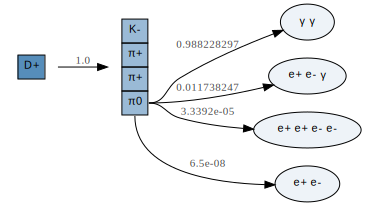

In [66]:
DecayChainViewer(dc)

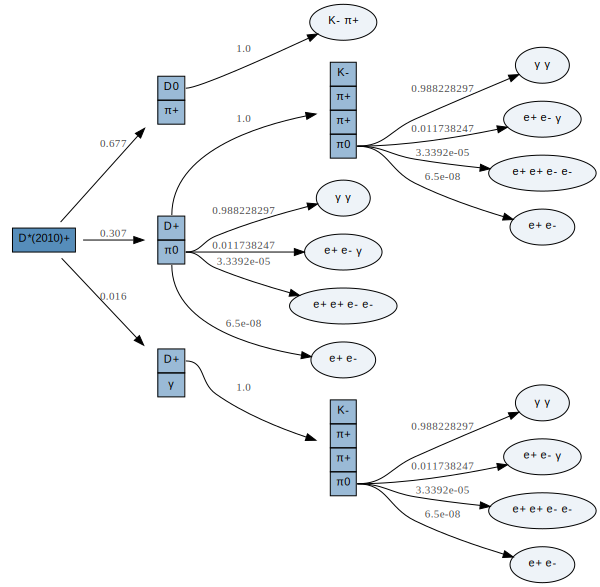

In [67]:
dc = dfp_Dst.build_decay_chains('D*+')
DecayChainViewer(dc)

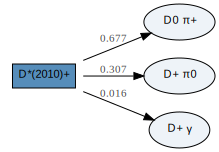

In [68]:
dc = dfp_Dst.build_decay_chains('D*+', stable_particles=['D+', 'D0', 'pi0'])
DecayChainViewer(dc)

#### Charge conjugation

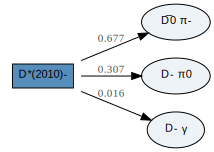

In [69]:
dc_cc = dfp_Dst.build_decay_chains('D*-', stable_particles=['D-', 'anti-D0', 'pi0'])
DecayChainViewer(dc_cc)

#### Parsing several files

Typically useful when the user decay file needs information from the master decay file.

In [70]:
s = u"""
Alias      MyXic+              Xi_c+
Alias      MyantiXic-          anti-Xi_c-
ChargeConj MyXic+              MyantiXic-

Decay Xi_cc+sig
  1.000       MyXic+    pi-    pi+       PHSP;
Enddecay
CDecay anti-Xi_cc-sig

Decay MyXic+
  1.000       p+    K-    pi+       PHSP;
Enddecay
CDecay MyantiXic-

End
"""

In [71]:
dfp = DecFileParser.from_string(s)
dfp.parse()
dfp

C:\home\sw\Anaconda3\lib\site-packages\decaylanguage\dec\dec.py:445: UserWarning: 
Corresponding 'Decay' statement for 'CDecay' statement(s) of following particle(s) not found:
anti-Xi_cc-sig.
Skipping creation of these charge-conjugate decay trees.
  warnings.warn(msg)


<DecFileParser: decfile(s)=<dec file input as a string>, n_decays=3>

Note the subtletly: 3, not 4 decays, are found! This is because the file contains no statement
`ChargeConj anti-Xi_cc-sigXi_cc+sig`, hence the parser cannot know to which particle (matching `Decay` statement) the charge-conjugate decay of `anti-Xi_cc-sig` relates to (code does not rely on position of statements to guess ;-)).

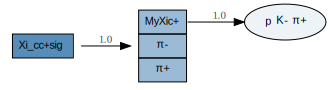

In [72]:
d = dfp.build_decay_chains('Xi_cc+sig')
DecayChainViewer(d)

As said in the warning, the information provided is not enough for the anti-Xi_cc-sig to make sense:

In [73]:
from decaylanguage.dec.dec import DecayNotFound

try:
    d = dfp.build_decay_chains('anti-Xi_cc-sig')
except DecayNotFound:
    print("Decays of particle 'anti-Xi_cc-sig' not found in .dec file!")

Decays of particle 'anti-Xi_cc-sig' not found in .dec file!


But the missing information is easily providing **parsing two files simultaneously ...!** (Any number of files is allowed.)

In [75]:
from tempfile import NamedTemporaryFile

with NamedTemporaryFile(delete=False) as tf:
    tf.write(s.encode('utf-8'))
    
dfp = DecFileParser(tf.name, 'data/DECAY_LHCB.DEC')
dfp.parse()

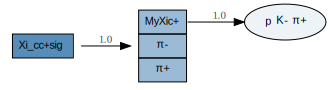

In [76]:
dc = dfp.build_decay_chains('Xi_cc+sig')

DecayChainViewer(dc)

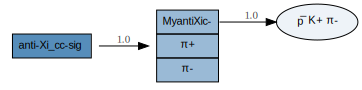

In [77]:
dc_cc = dfp.build_decay_chains('anti-Xi_cc-sig')

DecayChainViewer(dc_cc)

### 4. Representation of decay chains

<span style="color:green">The universal (and digital) representation of decay chains is of interest well outside the context of decay file parsing!</span>

#### Building blocks

- A <span style="color:green">daughters list</span> - list of final-state particles.
- A <span style="color:green">decay mode</span> - typically a branching fraction and a list of final-state particles (may also contain _any_ metadata such as decay model and optional decay-model parameters, as defined for example in .dec decay files).
- A <span style="color:green">decay chain</span> - can be seen as a mother particle and a list of decay modes.

In [78]:
from decaylanguage.decay.decay import DaughtersDict, DecayMode, DecayChain

**Daughters list** (actually a ``Counter`` dictionary, internally):

In [79]:
# Constructor from a dictionary
dd = DaughtersDict({'K+': 1, 'K-': 2, 'pi+': 1, 'pi0': 1})

# Constructor from a list of particle names
dd = DaughtersDict(['K+', 'K-', 'K-', 'pi+', 'pi0'])

# Constructor from a string representing the final state
dd = DaughtersDict('K+ K- pi0')
dd

<DaughtersDict: ['K+', 'K-', 'pi0']>

#### Decay Modes

In [80]:
# A 'default' and hence empty, decay mode
dm = DecayMode()

# Decay mode with minimal input information
dd = DaughtersDict('K+ K-')
dm = DecayMode(0.5, dd)

# Decay mode with decay model information and user metadata
dm = DecayMode(0.2551,                                              # branching fraction
               'pi- pi0 nu_tau',                                    # final-state particles
               model='TAUHADNU',                                    # decay model
               model_params=[-0.108, 0.775, 0.149, 1.364, 0.400],   # decay-model parameters
               study='toy', year=2019                               # user metadata
              )
dm

<DecayMode: daughters=nu_tau pi- pi0, BF=0.2551>

In [81]:
print(dm.describe())

Daughters: pi- pi0 nu_tau , BF: 0.2551         
    Decay model: TAUHADNU [-0.108, 0.775, 0.149, 1.364, 0.4]
    Extra info:
        study: toy
        year: 2019



Various manipulations are available:

In [82]:
dm = DecayMode.from_pdgids(0.5, [321, -321])
print(dm)

dm = DecayMode(1.0, 'K+ K+ pi-')
dm.charge_conjugate()

<DecayMode: daughters=K+ K-, BF=0.5>


<DecayMode: daughters=K- K- pi+, BF=1.0>

#### Decay chains 

In [83]:
dm1 = DecayMode(0.0124, 'K_S0 pi0', model='PHSP')
dm2 = DecayMode(0.692, 'pi+ pi-')
dm3 = DecayMode(0.98823, 'gamma gamma')
dc = DecayChain('D0', {'D0':dm1, 'K_S0':dm2, 'pi0':dm3})

dc

<DecayChain: D0 -> K_S0 pi0 (2 sub-decays), BF=0.0124>

Flatten the decay chain, i.e. replace all intermediate, decaying particles, with their final states:
- The BF is now the *visible BF*

In [84]:
dc.flatten()

<DecayChain: D0 -> gamma gamma pi+ pi- (0 sub-decays), BF=0.008479803984>

In [85]:
dc.print_as_tree()

D0
+--> K_S0
|    +--> pi+
|    +--> pi-
+--> pi0
     +--> gamma
     +--> gamma


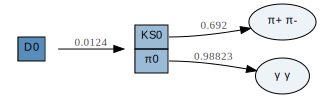

In [86]:
#dcv = DecayChainViewer(dc.to_dict())
#dcv.graph.write_pdf('test.pdf')

DecayChainViewer(dc.to_dict())

### Interested ? Want to try it ?

#### Particle
- GitHub: https://github.com/scikit-hep/particle/
- Releases: [PyPI](https://pypi.org/project/Particle/)

#### DecayLanguage
- GitHub: https://github.com/scikit-hep/decaylanguage
- Releases: [PyPI](https://pypi.org/project/decaylanguage/)
